2023-07-13 21:14:04.067861: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 21:14:04.242123: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.2/lib64:/usr/local/cuda-10.2/lib64:
2023-07-13 21:14:04.242155: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-13 21:14:05.116074: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror:

Tensorflow v2.11.0
Tensorflow Decision Forests V1.2.0
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  

<AxesSubplot:>

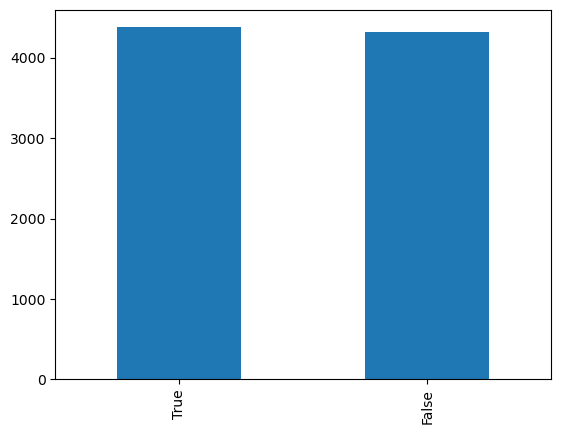

In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Tensorflow v" + tf.__version__)
print("Tensorflow Decision Forests V" + tfdf.__version__)
dataset_df = pd.read_csv('../data/train.csv')
print(dataset_df.head(5))

print("0" * 100)
print(dataset_df.columns)
print("2" * 100)
# There are 12 feature columns. Using these features your model has to predict whether the passenger is rescued or not indicated by the column Transported.
#
# add Codeadd Markdown
# Let us quickly do a basic exploration of the dataset
print(dataset_df.describe())
print(dataset_df.info())
# Bar chart for label column: Transported¶
plot_df = dataset_df.Transported.value_counts()
plot_df.plot(kind='bar')
# Numerical data distribution¶
# Let us plot all the numerical columns and their value counts:


# Prepare the dataset¶
# We will drop both PassengerId and Name columns as they are not necessary for model training.


<AxesSubplot:xlabel='VRDeck', ylabel='Count'>

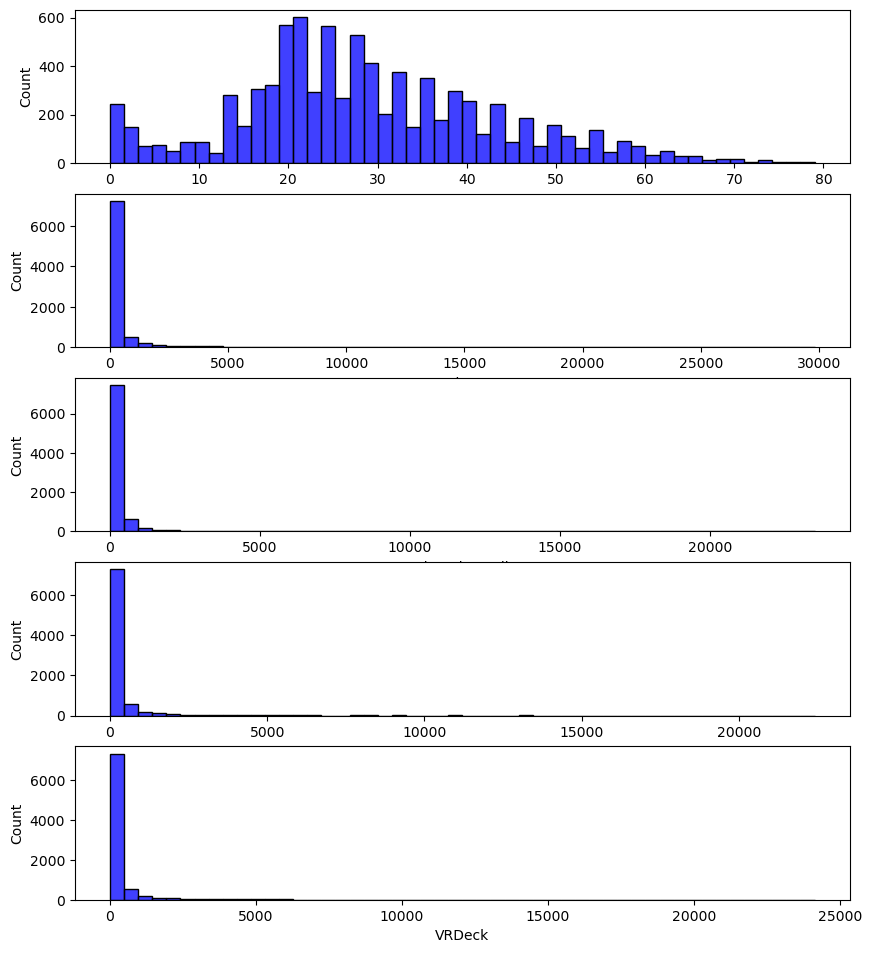

In [2]:
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
plt.subplots_adjust(top=1)
sns.histplot(dataset_df['Age'], bins=50, color='b', ax=ax[0])
sns.histplot(dataset_df['FoodCourt'], bins=50, color='b', ax=ax[1])
sns.histplot(dataset_df['ShoppingMall'], bins=50, color='b', ax=ax[2])
sns.histplot(dataset_df['Spa'], bins=50, color='b', ax=ax[3])
sns.histplot(dataset_df['VRDeck'], bins=50, color='b', ax=ax[4])

In [3]:
dataset_df=dataset_df.drop(['PassengerId','Name'],axis=1)
print(dataset_df.head(5))

  HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0     Europa     False  B/0/P  TRAPPIST-1e  39.0  False          0.0   
1      Earth     False  F/0/S  TRAPPIST-1e  24.0  False        109.0   
2     Europa     False  A/0/S  TRAPPIST-1e  58.0   True         43.0   
3     Europa     False  A/0/S  TRAPPIST-1e  33.0  False          0.0   
4      Earth     False  F/1/S  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0        0.0           0.0     0.0     0.0        False  
1        9.0          25.0   549.0    44.0         True  
2     3576.0           0.0  6715.0    49.0        False  
3     1283.0         371.0  3329.0   193.0        False  
4       70.0         151.0   565.0     2.0         True  


In [4]:
dataset_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [5]:
dataset_df.shape

(8693, 12)

In [6]:
dataset_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [7]:
dataset_df = dataset_df.drop(['PassengerId', 'Name'], axis=1)
print("4" * 100)
print(dataset_df.head(5))

# plt.show()
# We will check for the missing values using the following code:
dataset_df.isnull().sum().sort_values(ascending=False)
# This dataset contains a mix of numeric, categorical and missing features. TF-DF supports all these feature types natively, and no preprocessing is required.
#
# But this datatset also has boolean fields with missing values. TF-DF doesn't support boolean fields yet. So we need to convert those fields into int. To account for the missing values in the boolean fields, we will replace them with zero.
#
# In this notebook, we will replace null value entries with zero for numerical columns as well and only let TF-DF handle the missing values in categorical columns.
#
# Note: You can choose to let TF-DF handle missing values in numerical columns if need be.
dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = dataset_df[[
'VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
]].fillna(value=0)

KeyError: "['PassengerId' 'Name'] not found in axis"

In [ ]:
dataset_df.Cabin.head()

In [ ]:

label = 'Transported'
dataset_df[label] = dataset_df[label].astype(int)
# We will also convert the boolean fields CryoSleep and VIP to int.
print("5" * 100)
dataset_df['VIP'] = dataset_df['VIP'].astype(int)
dataset_df['CryoSleep'] = dataset_df['CryoSleep'].astype(int)
# The value of column Cabin is a string with the format Deck/Cabin_num/Side. Here we will split the Cabin column and create 3 new columns Deck, Cabin_num and Side, since it will be easier to train the model on those individual data.
# Run the following command to split the column Cabin into columns Deck, Cabin_num and Side
dataset_df[[ "Deck", "Cabin_num", "Side"]]=dataset_df['Cabin'].str.split('/',expand=True)
# Remove original Cabin column from the dataset since it's not needed anymore.
print("6" * 100)
print(dataset_df.columns)
try:
    dataset_df.drop('Cabin',inplace=True,axis=1)
except KeyError:
    print('Field does not exists!')



In [8]:
dataset_df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
